<a href="https://colab.research.google.com/github/Ariqueeezz/Deployment-Test/blob/main/Production_DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [1]:
# Untuk memanipulasi data
import pandas as pd

# Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Sampling
from imblearn.combine import SMOTEENN
from collections import Counter

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

# Export Model to .joblib
import joblib

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBClassifier

# ***Data Loading***

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah-Datasets/Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv") # Load Data dari Google Drive Path

# ***EDA (Exploratory Data Analysis)***

In [5]:
data.head() # Menampilkan 5 Data paling atas

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.info() # Menampilkan seluruh info tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.describe() # Menampilak informasi statistik deskriptif dari fitur numerik pada dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
diabetes = (data.loc[data['Diabetes_binary'] == 1.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100
no_diabetes = (data.loc[data['Diabetes_binary'] == 0.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100

percentage_of_target_distribution = pd.DataFrame({
    'Diabetes': f"{diabetes:.2f}%",
    'No Diabetes': f"{no_diabetes:.2f}%"
}, index=['Target'])

percentage_of_target_distribution.T

,Target
Diabetes,13.93%
No Diabetes,86.07%


In [9]:
data.groupby('Diabetes_binary')['Diabetes_binary'].count() # Cek Distribusi Kelas pada Target

,Diabetes_binary
Diabetes_binary,
0.0,218334
1.0,35346


In [10]:
data_vis = data.copy() # Menyimpan data khusus untuk visualisasi

nama_target = {
    0: 'Tidak Diabetes',
    1: 'Diabetes',
}

# Mengubah nilai Target menjadi label Asli (Diabetes dan Tidak Diabetes) untuk Visualisasi
data_vis['Diabetes_binary'] = data_vis['Diabetes_binary'].map(nama_target)
data_vis.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Tidak Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,Tidak Diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,Tidak Diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,Tidak Diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,Tidak Diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## **Mendeteksi Class Imbalance**

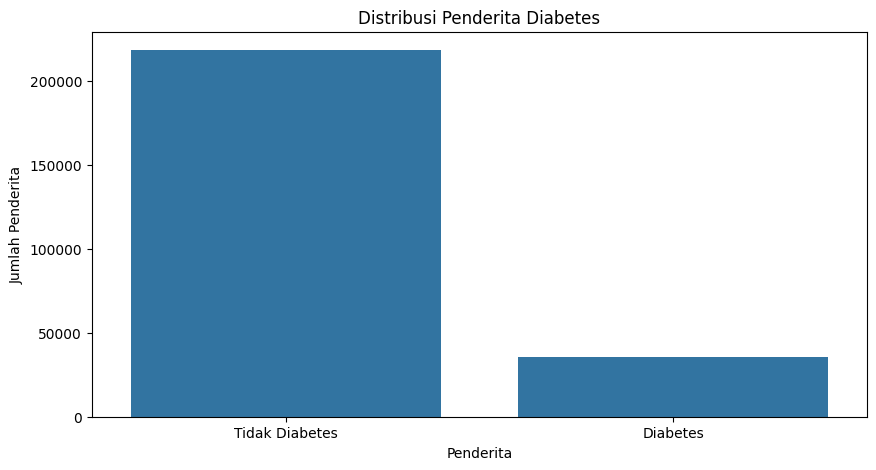

In [11]:
# Visualisasi Distribusi Penderita Diabetes (Target)
plt.figure(figsize=(10,5))
sns.countplot(data_vis, x='Diabetes_binary')
plt.title("Distribusi Penderita Diabetes")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

## **Mengecek Fitur yang Berpengaruh terhadap Target**

Text(0.5, 0, 'Fitur')

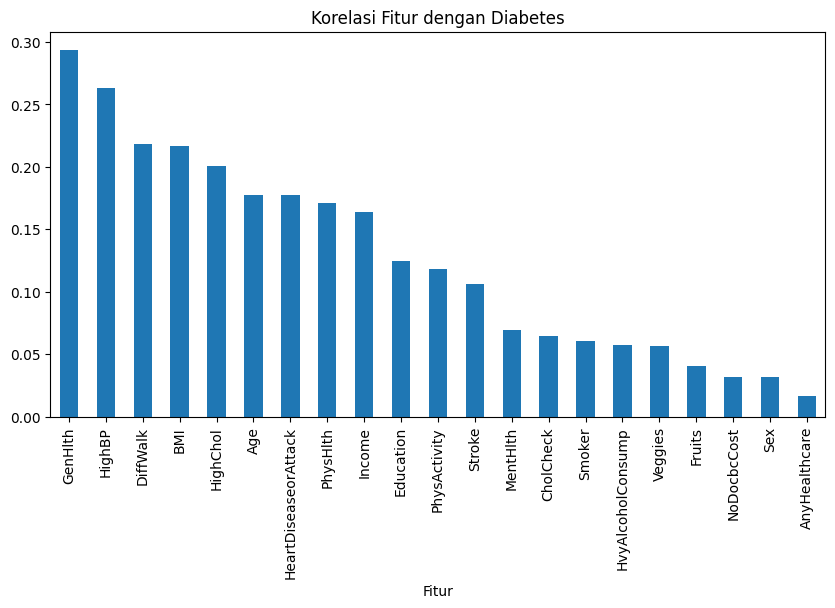

In [12]:
# Visualisasi Hubungan Fitur dengan Targetnya
target_corr = data.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
target_corr[1:].plot(kind='bar', figsize=(10,5))
plt.title("Korelasi Fitur dengan Diabetes")
plt.xlabel("Fitur")

## **Mendeteksi Multicollinearity**

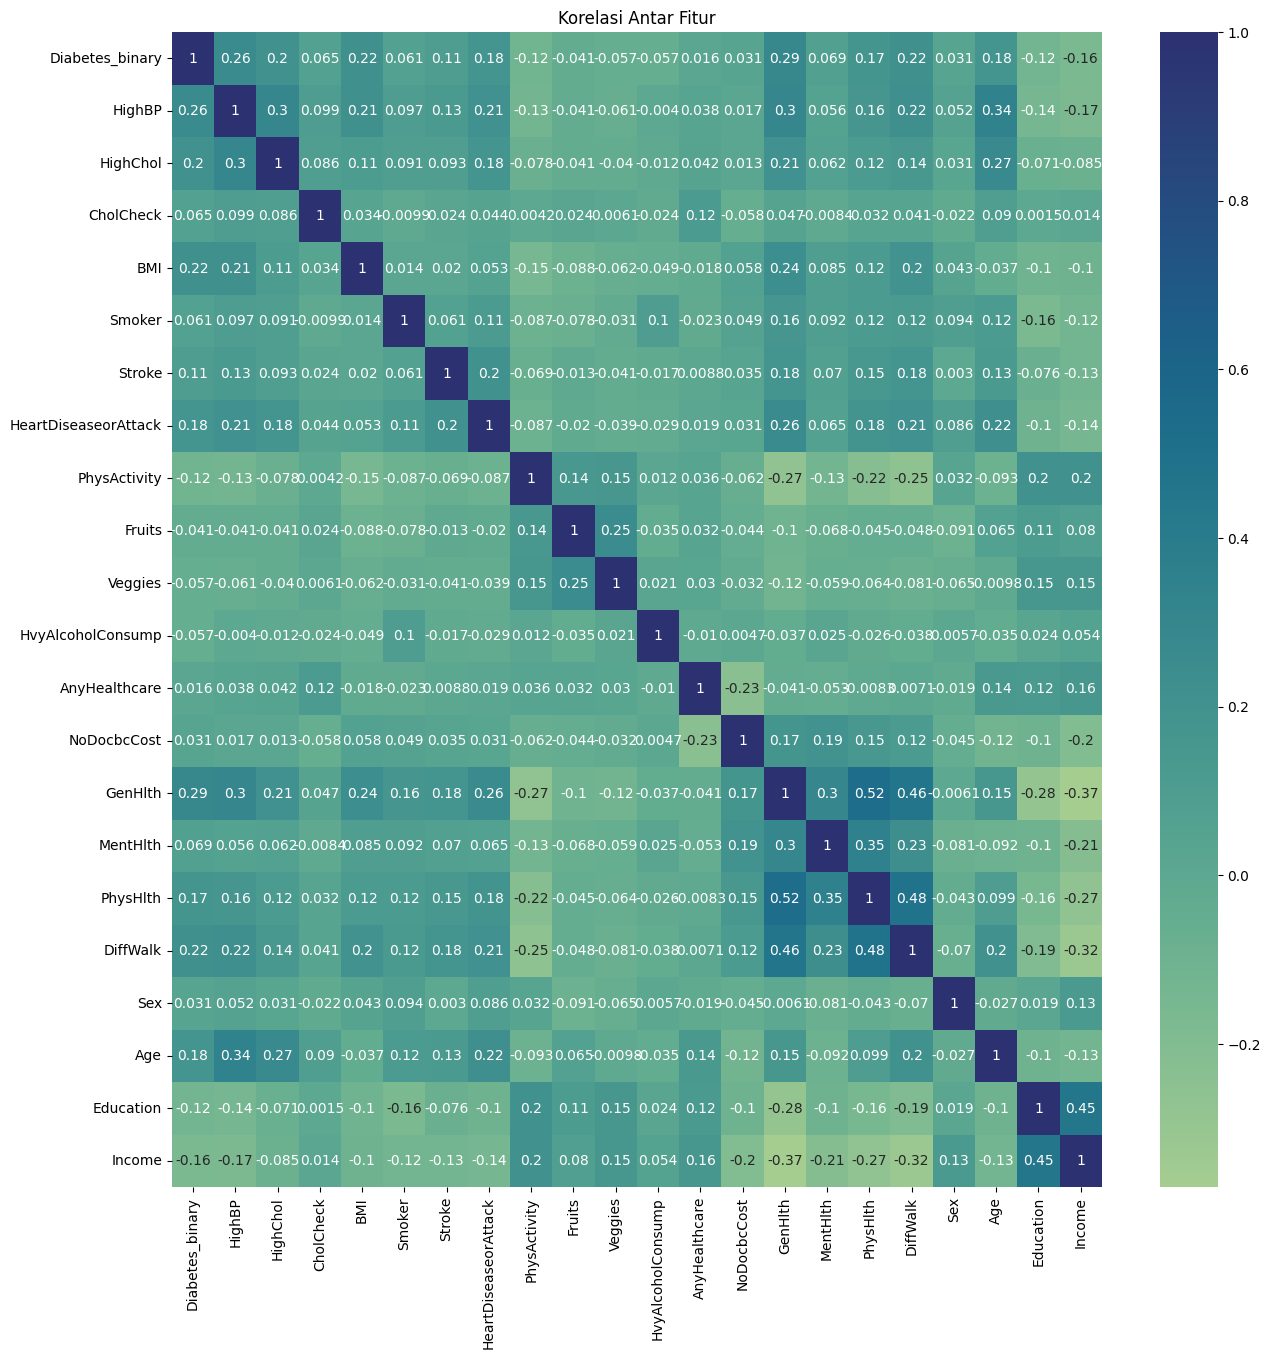

In [13]:
# Visualisasi Hubungan semua kolom
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.title("Korelasi Antar Fitur")
plt.show()

## **Mendeteksi Outlier**

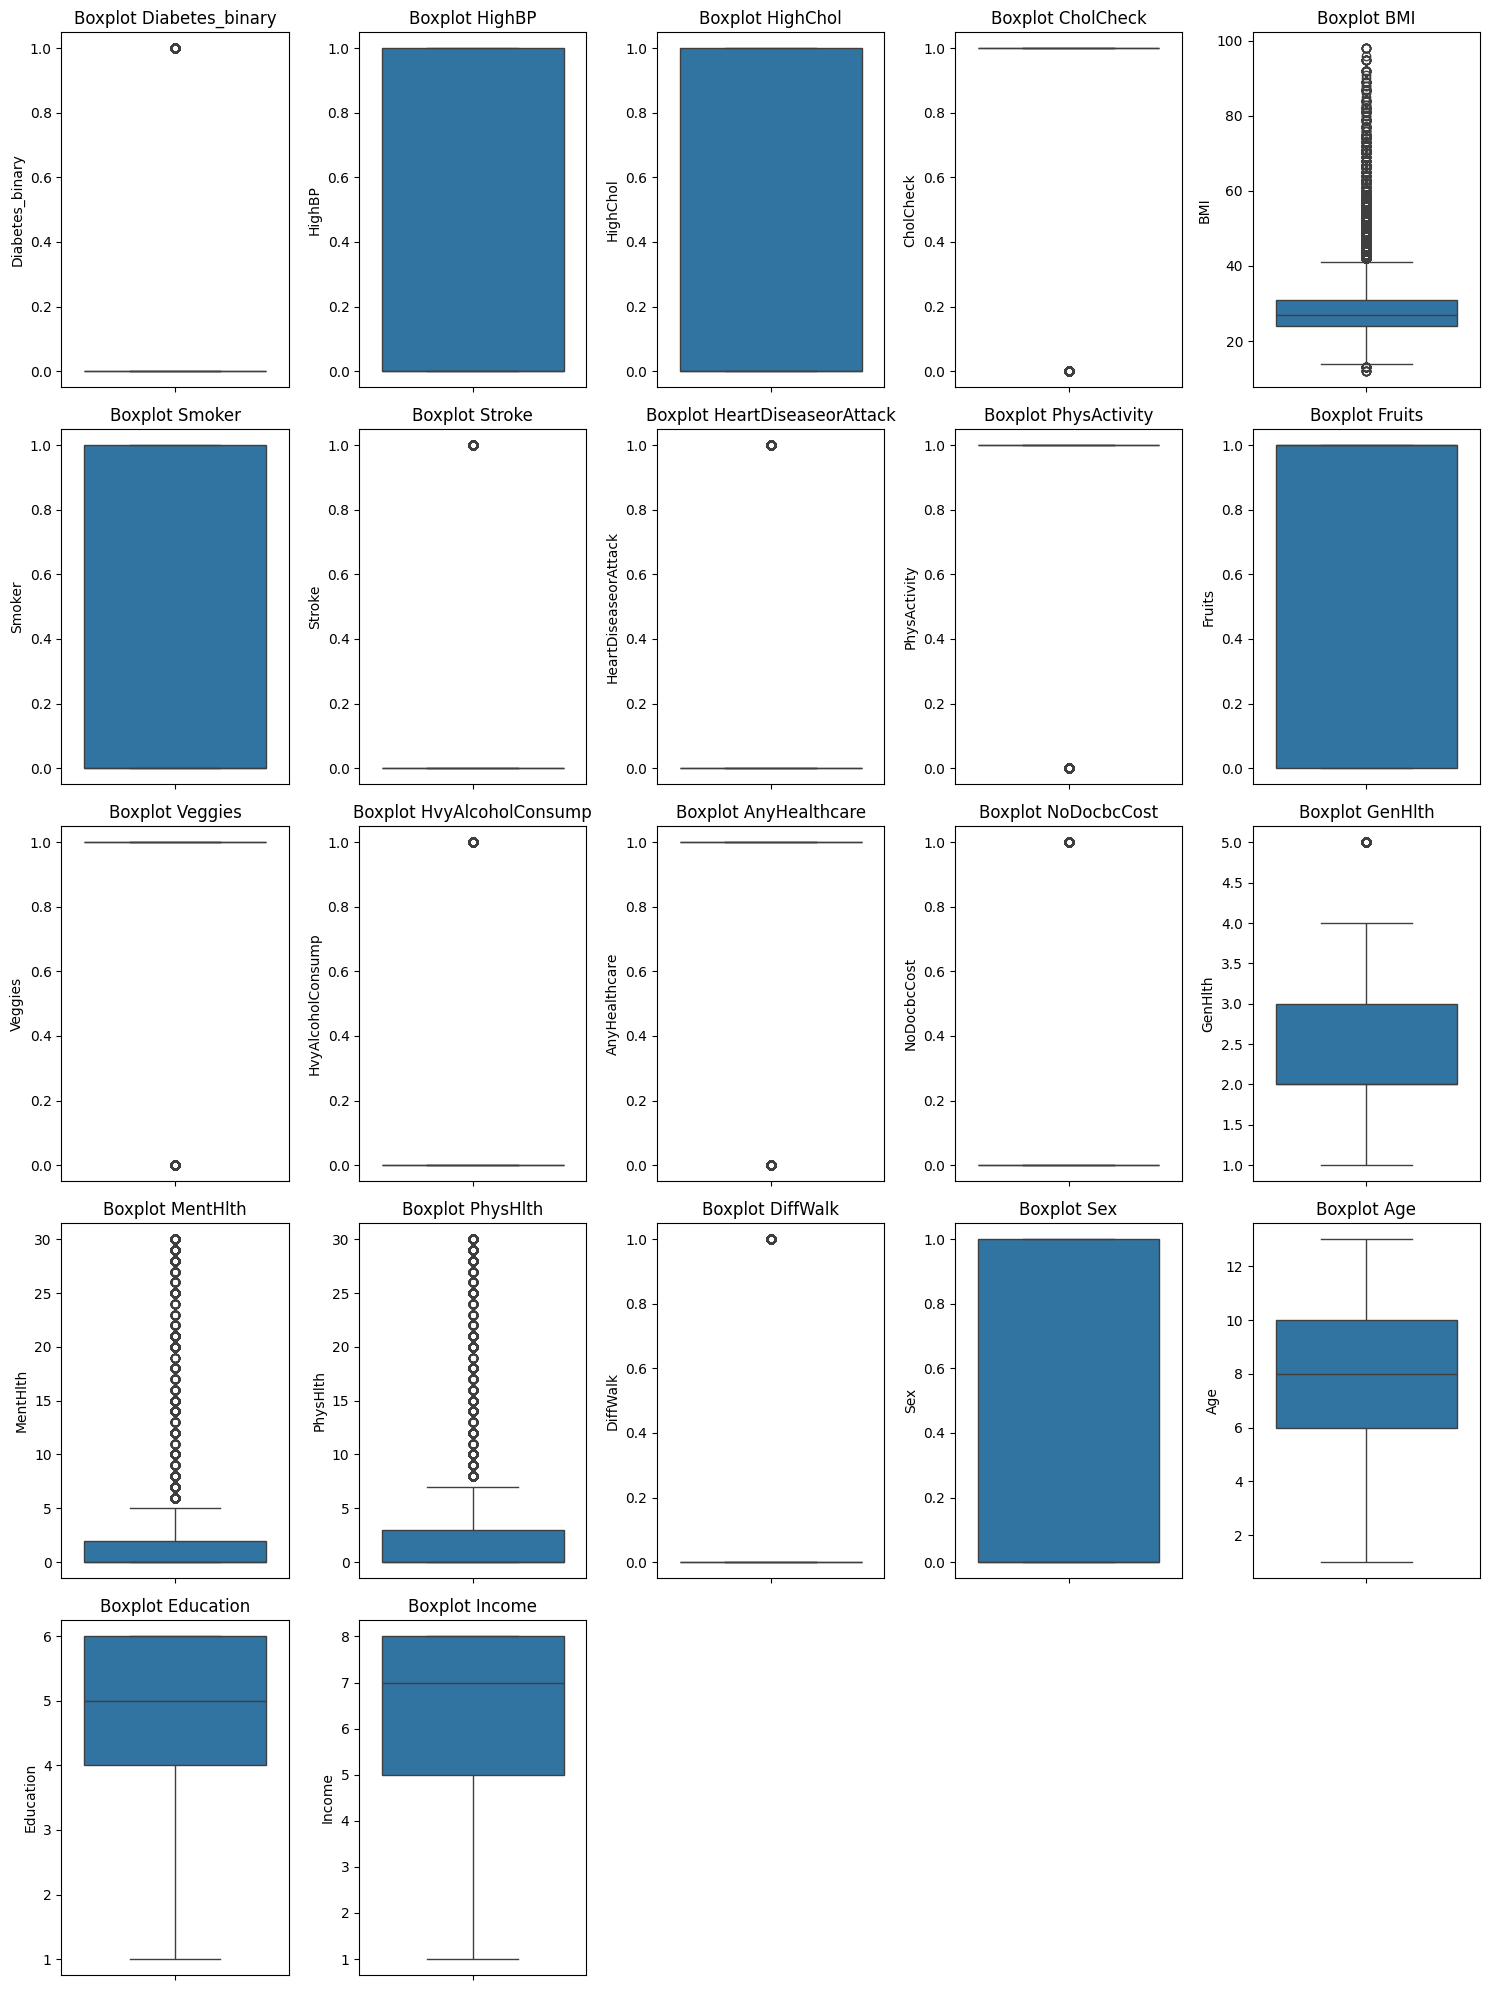

In [14]:
n_vars = data.shape[1]
n_rows = 5
n_cols = -(-n_vars // n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(data=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

for i in range(n_vars, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ***Model Selection***

***Resampling***
---
**Combine Sampling**: metode yang menambahkan sampel pada kelas minoritas sehingga jumlah nya seimbang dengan kelas mayoritas. Metode ini memastikan agar model bisa memiliki kesempatan yang seimbang dalam mempelajari kelas minoritas.

Metode yang saya pakai untuk over sampling ini adalah SMOTE yang lebih bagus daripada Random Oversampling, karena data baru yang dibuat untuk menambahkan kelas minoritas adalah data sintetis hasil dari interpolasi daripada menduplikasi data yang sudah ada.

***Feature Scaling***
---
**Feature Scaling:** Penyesuaian Rentang Nilai pada Fitur-Fitur Numerik agar semua fitur dalam rentang yang seragam.

*Bagaimana jika nilai pada fitur-fitur yang kita punya tidak dalam rentang nilai yang sama?*

Misalkan ada fitur
- BMI: Skala nilai 12-98
- MentalHealth: Skala nilai 0-30
- Smoker: Biner 0 dan 1 (Ya/Tidak)

Algoritma akan mengira bahwa BMI adalah Fitur paling penting/berkontribusi karena memiliki nilai fitur yang lebih besar daripada fitur fitur lainnya padahal belum tentu fitur BMI paling penting/paling mempengaruhi nilai target. Maka ***Feature Scaling*** ini memastikan **agar semua fitur dapat berkontribusi dengan seimbang** dalam proses training model.

**Alasan memakai Normalization** (MinMaxScaler), karena nilai fitur pada dataset kebanyakan biner 0/1, maka dari itu akan lebih bagus jika menyesuaikan nilai skala fitur menjadi [0, 1].

> Skala nilai Fitur akan sangat berpengaruh pada algoritma berbasis jarak atau kemiripan antar data, terkadang Feature Scaling juga berpengaruh terhadap Algoritma berbasis pohon keputusan.







In [15]:
# Splitting Data
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

================= Random Forest ==================


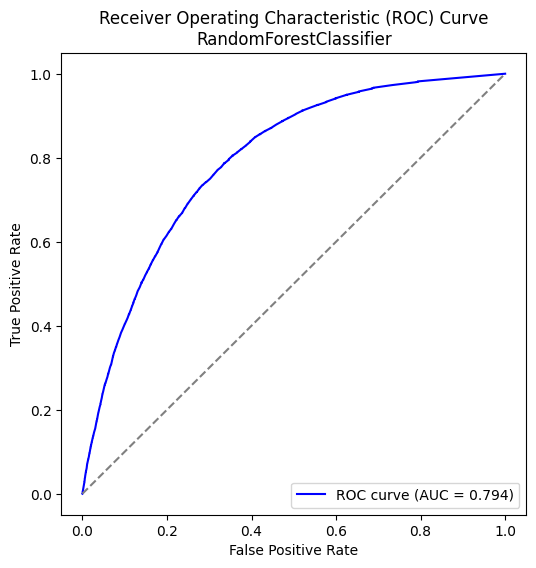

Accuracy: 0.856255912961211
Precision: 0.45368072787427627
Recall: 0.15518460885556656
F1_Score: 0.23126383472119744
AUC Score: 0.7944777658788377

Recall CV Score Fold-1: 0.15278514588859415
Recall CV Score Fold-2: 0.15455349248452696
Recall CV Score Fold-3: 0.14904526166902404
Recall CV Score Fold-4: 0.15434936350777934
Recall CV Score Fold-5: 0.15473032714412024
Mean Recall CV Score: 0.15309271813880895

Threshold Tuning Recall Score 0.4631489602489744

=============== XGBoost Classifier ===============


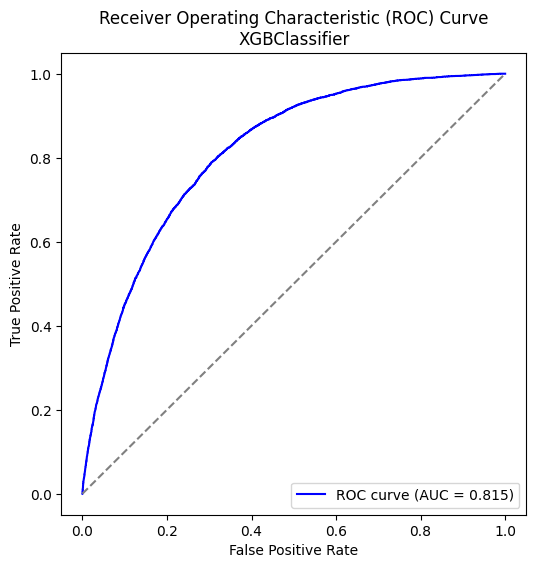

Accuracy: 0.6649124881740776
Precision: 0.2722018348623853
Recall: 0.8394398076106946
F1_Score: 0.4110984100592331
AUC Score: 0.8145150130754456

Recall CV Score Fold-1: 0.8314765694076038
Recall CV Score Fold-2: 0.8268788682581786
Recall CV Score Fold-3: 0.8313295615275813
Recall CV Score Fold-4: 0.8362800565770863
Recall CV Score Fold-5: 0.8396109637488948
Mean Recall CV Score: 0.833115203903869

Threshold Tuning Recall Score 0.9292686377139624

Best Model:
Recall Score Test: 0.8394398076106946
Best Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_

In [35]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', n_estimators=200)
xgb = XGBClassifier(random_state=42, scale_pos_weight=10, n_estimators=200)

model_scores = []
models = [
    ('Random Forest', rfc, None),
    ('XGBoost Classifier', xgb,
     {'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000]})
]

best_model = None
best_score = 0.0
best_params = {}

for model_name, model, param in models:
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])


    # Model Training
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Cross Validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall:': recall,
        'Precision': precision,
        'F1 Score': f1,
        'AUC Score': roc_auc,
        })

    print(f" {model_name} ".center(50, "="))
    model_scores_df = pd.DataFrame(model_scores)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1_Score: {f1}")
    print(f"AUC Score: {roc_auc}\n")

    for i, score in enumerate(cv_scores):
      print(f"Recall CV Score Fold-{i+1}: {score}")
    print(f"Mean Recall CV Score: {cv_scores.mean()}")
    print()

    threshold = 0.3
    y_pred_adjusted = (y_prob >= threshold).astype(int)

    print(f"Threshold Tuning Recall Score {recall_score(y_test, y_pred_adjusted)}")
    print()

    if recall > best_score:
        best_score = recall
        best_model = pipeline

print(f"Best Model:")
print(f"Recall Score Test: {best_score}")
print(f"Best Model: {best_model} with recall {best_score:.2f}")

## **Model Evaluation**

### **METRIK EVALUASI UTAMA:** Precision dan AUC Score. (UNTUK DETEKSI DINI)
Metrik Evaluasi yang digunakan:
- Precision Score: Dari semua hasil prediksi yang positif, ada berapa banyak hasil prediksi yang benar benar positif.
- Recall Score: Dari semua yang benar benar positif, ada berapa banyak prediksi yang berhasil diprediksi positif
- F1-Score: Rata-Rata Harmoni antara Precision dan Recall
- Confusion Matrix: Untuk melihat hasil prediksi (TP, TN, FP, FN)
- ROC Curve dan AUC: Untuk menilai seberapa baik model dalam membedakan mana yang benar-benar sakit dan mana yang tidak.

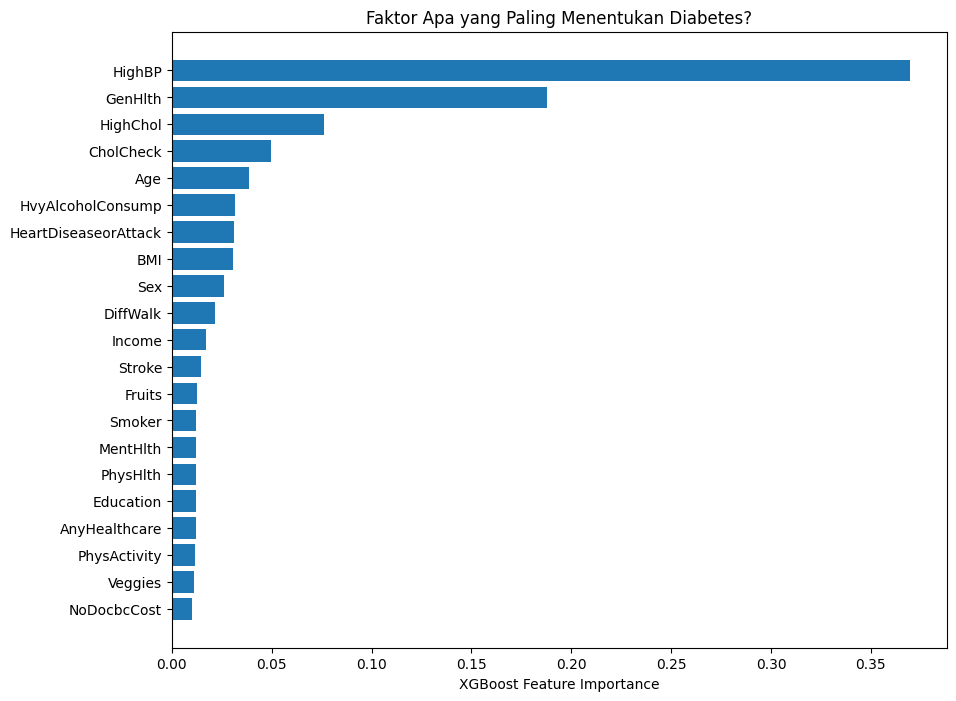

In [17]:
# Fitur penting yang dapat mempengaruhi Hasil Prediksi
xgboost_model = best_model.named_steps['model']
feature_names = X.columns

sorted_idx = xgboost_model.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], xgboost_model.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Faktor Apa yang Paling Menentukan Diabetes?")
plt.show()

In [18]:
xgboost_model.feature_importances_

array([0.3695566 , 0.07605328, 0.04966939, 0.03047667, 0.01229931,
       0.0144907 , 0.03097413, 0.01178651, 0.01264765, 0.01120569,
       0.03160617, 0.01189186, 0.01003993, 0.18780826, 0.0120742 ,
       0.0120477 , 0.02138159, 0.02624004, 0.0384843 , 0.01202242,
       0.01724358], dtype=float32)

In [19]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77     43667
         1.0       0.27      0.84      0.41      7069

    accuracy                           0.66     50736
   macro avg       0.62      0.74      0.59     50736
weighted avg       0.86      0.66      0.72     50736



In [20]:
results = {
    'RandomForestClassifier' : confusion_matrix(y_test, rfc.predict(X_test), labels=rfc.classes_),
    'XGBoostClassifier' : confusion_matrix(y_test, best_model.predict(X_test), labels=best_model.classes_)
}

results

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'RandomForestClassifier': array([[42914,   753],
        [ 6492,   577]]),
 'XGBoostClassifier': array([[27801, 15866],
        [ 1135,  5934]])}

In [21]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=results['XGBoostClassifier'], display_labels=best_model.classes_)

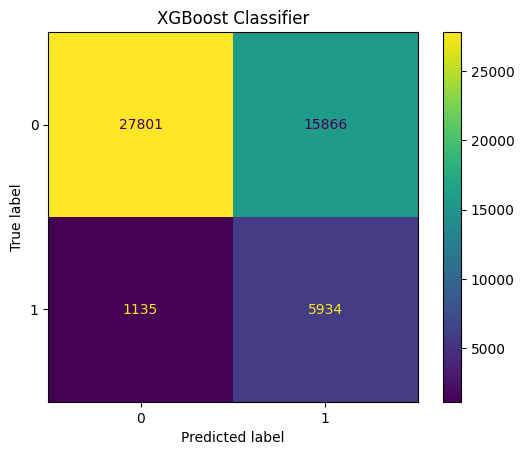

In [22]:
disp1.plot()
plt.title("XGBoost Classifier")
plt.show()

**Hasil Evaluasi**
-
# **Precision Score**


---


- Kelas Sehat (0) **96%**

  Dari semua pasien yang "dianggap" Sehat,
  - 96% Pasien **"benar"** Sehat (TN), dan
  - 4% Pasien **"dianggap"** Sehat padahal Diabetes (FN)

> Notes:
  >
  > Model Sudah Handal dalam Memprediksi Kelas Sehat (0) dan juga handal dalam Menghindari False Negative atau Sehat Palsu, Aslinya Diabetes
  >

- Kelas Diabetes (1) **27%**

  Dari semua pasien yang "dianggap" Diabetes,
  - 27% Pasien **"benar"** Diabetes (TP), dan
  - 73% Pasien **"dianggap"** Diabetes padahal Sehat (FP)

> Notes:
  >
  > **BAGUS UNTUK DETEKSI DINI**, Karena LEBIH BAIK ada banyak orang sehat yang dianggap diabetes lalu lanjut mengikuti pemeriksaan selanjutnya yaitu Cek Darah Lab dan ternyata hasilnya negatif, daripada ada banyak orang yang dianggap sehat padahal diabetes dan akhirnya meninggal karena tidak menjalani pengobatan.
  >

# **Recall Score**


---

- Kelas Sehat (0) **64%**

  Dari semua pasien yang **"Benar"** Sehat,
  - 64% Pasien **"benar"** Sehat (TN), dan
  - 36% Pasien **"dianggap"** Diabetes padahal Sehat (FP)

> Notes:
  >
  > Model Cukup Handal dalam Mendeteksi Dini Pasien yang "Benar" Sehat, dari Seluruh Data Pasien Sehat ada 64% Pasien yang berhasil di prediksi Sehat.
  >

- Kelas Diabetes (1) **85%**

  Dari semua pasien yang "dianggap" Diabetes,
  - 85% Pasien **"benar"** Diabetes (TP), dan
  - 15% Pasien **"dianggap"** Sehat padahal Diabetes (FN)

> Notes:
  >
  > **BAGUS UNTUK DETEKSI DINI**, Karena Model 85% berhasil Mendeteksi Pasien Diabetes dengan "Benar" dari seluruh Pasien Diabetes. Tetapi, 15% Pasien lolos dari pemeriksaan lanjutan, karena dianggap Sehat padahal Diabetes.
  >

# **AUC Score**


---

- AUC (Area Under Curve) **82%**

  Model sudah Bisa Membedakan Mana Pasien Diabetes dan Mana Pasien Sehat, dengan Probabilitas antara True Positive Rate dengan False Positive Rate yang terlihat pelan pelan TPR naik signifikan sampai TPR 0.8 dadn FPR 0.4

> Notes:
  >
  > Model Cukup Handal dalam Mendeteksi Dini Pasien yang "Benar" Diabetes. Karena model sudah cukup bisa membedakan Mana yang Asli dan Mana yang hanya Dianggap.


# ***Model Explainability / XAI (Explainable AI)***

**Fitur Penting**
---
Fitur ini adalah **Faktor yang mempengaruhi Pasien bisa disebut Diabetes atau Tidak**. Ada 3 Faktor penting yang dapat meningkatkan resiko pasien bisa disebut Diabetes. **Berikut Diurutkan berdasarkan Nilai Kepentingannya.**


---

- HighBP (Tekanan Darah Tinggi)
- GenHlth (Kesehatan secara Keseluruhan)
- HighChol (Kolesterol Tinggi)
> Notes:
  >
  > HighBP (Tekanan Darah Tinggi) dan HighChol (Kolesterol Tinggi) adalah fitur terpenting sangatlah AKURAT secara medis
  >
  > Model Tidak Berhalusinasi dan berhasil menangkap hubungan biologis nyata antara tekanan darah, kolesterol, dan diabetes tanpa kamu ajari teori kedokteran.

# ***Export Model***

In [23]:
joblib.dump(best_model, 'diabetes_model.joblib')

['diabetes_model.joblib']

# ***Testing Model***

In [24]:
diabetes_model = joblib.load('/content/drive/MyDrive/Kuliah-Datasets/Diabetes/diabetes_model.joblib')

data_baru = X_test.iloc[[17]]
label_baru = y_test.iloc[17]

prediksi_baru = diabetes_model.predict(data_baru)
prediksi_lama = best_model.predict(data_baru)

print(f"Data Pasien:\n{data_baru}")
print("="*50)
print(f"Label Asli\t: {"Diabetes" if label_baru == 1 else "Tidak Diabetes"}")
print(f"Label Prediksi\t: {"Diabetes" if prediksi_baru == 1 else "Tidak Diabetes"}")
print("="*50)

try:
  assert prediksi_lama[0] == prediksi_baru[0]
  print("✅ Validasi Sukses: Model yang disimpan bekerja 100% sama dengan yang dilatih.")
except:
  print("❌ Validasi Gagal")

Data Pasien:
        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
195858     0.0       0.0        1.0  46.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
195858                   0.0           0.0     1.0      1.0  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
195858            1.0          0.0      2.0       0.0       0.0       0.0   

        Sex  Age  Education  Income  
195858  0.0  4.0        5.0     3.0  

[1 rows x 21 columns]
Label Asli	: Tidak Diabetes
Label Prediksi	: Tidak Diabetes
✅ Validasi Sukses: Model yang disimpan bekerja 100% sama dengan yang dilatih.


/usr/lib/python3.12/pickle.py:1760: UserWarning: [07:15:42] WARNING: /workspace/src/collective/../data/../common/error_msg.h:83: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)
